## Machine Learning - Problema de Clasificación

En este ejercicio partiremos de un dataset de prueba para su análisis y la posterior creación de un modelo de clasificación que tratará de estimar la clase de una variable dependiente en casos futuros.
Se seguirán los pasos recomendados de análisis de los datos, preprocesado, división de los datos, creación de modelos y evaluación de los mismos.

Se usará **Jupyter Notebook** con **Python** como lenguaje de programación.

<br><br>**Juan Manuel Ramos Pérez**

========================================================================================================================

## 1. Librerías

Comenzamos estableciendo todas las librerías de Python que nos harán falta para la realización del ejercicio, ordenadas según su función.

In [1]:
# Tratamiento de datos
# ========================================
import numpy as np
import pandas as pd


# Gráficos
# ========================================
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns


# Preprocesado
# ========================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split



# Modelos
# ========================================
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.model_selection import GridSearchCV


# Métricas
# ========================================
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer


In [2]:
# Configuración
# ========================================
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('display.max_rows', None)

## 2. Carga del dataset

Cargamos el dataset en el proyecto. Este se puede encontrar disponible en [UCI](https://archive.ics.uci.edu/ml/datasets/Rice+%28Cammeo+and+Osmancik%29).

Este dataset está compuesto por 3810 instancias, y recoge diferentes características morfológicas de granos de arroz cultivados en Turquía, la variedad Osmancik y la variedad Cammeo. La idea es crear un modelo que sea capaz de predecir de forma precisa la variedad a la que pertenece un grano de arroz en función de las características mencionados.

Las columnas de las que se compone el dataset son las siguientes:
* Area (Area): numérica
* Perímetro (Perimeter): numérica
* Longitud del eje mayor (Major Axis Length): numérica
* Longitud del eje menor (Minor Axis Length): numérica
* Excentricidad (Eccentricity): numérica
* Área convexa (Convex Area): numérica
* Extensión (Extent): numérica
* Clase (Class): categórica


La variable "Class" será nuestra variable respuesta, o variable dependiente, aquella que queremos que nuestro modelo estime en datos futuros. Al tratarse de una variable categórica estamos ante un problema de clasificación, en el que tenemos como variables independientes o predictores numéricos.

In [31]:
df = pd.read_excel('data/Rice_Osmancik_Cammeo_Dataset.xlsx')
df.head(10)

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


## 3. Análisis de los datos

En esta parte del ejercicio nos centraremos en analizar los datos de los que disponemos. Comprobar su distribución en el dataset, averiguar si se están reconociendo de forma adecuada, duplicidad, datos faltantes, así como decidir si debemos realizar algún o algunos cambios sobre ellos en el apartado de preprocesado de cara a construir el modelo de predicción.

#### 3.1. TIPOS DE DATOS

En primer lugar comprobamos el tipo de dato interpretado por el dataframe de Pandas, y verificamos que todo está como se espera.

In [4]:
df.dtypes

AREA              int64
PERIMETER       float64
MAJORAXIS       float64
MINORAXIS       float64
ECCENTRICITY    float64
CONVEX_AREA       int64
EXTENT          float64
CLASS            object
dtype: object

Todas las columnas tienen el tipo de dato esperado.

#### 3.2. VALORES FALTANTES

Comprobamos si hay celdas vacías en alguno de los registros. 

Esta comprobación es importante, ya que la existencia de valores nulos o vacíos pueden llegar a tener un impacto negativo considerable en el entrenamiento del modelo. En caso de que los hubiese tendríamos que decidir de qué forma lidiar con ellos, o bien eliminando el registro completo del dataset o bien sustituyendo el valor vacío por otro.

In [5]:
df.isna().sum().sort_values()

AREA            0
PERIMETER       0
MAJORAXIS       0
MINORAXIS       0
ECCENTRICITY    0
CONVEX_AREA     0
EXTENT          0
CLASS           0
dtype: int64

No faltan datos

#### 3.3. FILAS DUPLICADAS

In [6]:
df[df.duplicated()]

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS


#### 3.4. SEPARACIÓN DE VARIABLES

Creamos listas para separar las variables independientes en características, o features, y la variable dependiente o label.

Esto nos va a permitir hacer referencia a ellas más adelante de forma más cómoda.

In [7]:
features = ['AREA','PERIMETER','MAJORAXIS','MINORAXIS','ECCENTRICITY','CONVEX_AREA','EXTENT']
label = 'CLASS'

#### 3.5. VARIABLE RESPUESTA

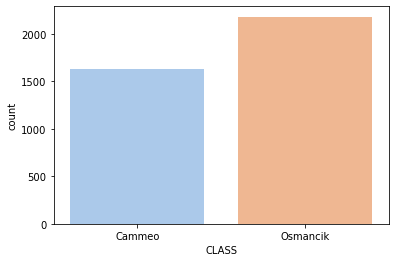

In [8]:
sns.countplot(x=df['CLASS'], label="Count", palette  = "pastel",)
plt.show()

#### 3.6. VARIABLES PREDICTORAS

En este caso coincide que todas las variables predictoras son numéricas y la variable respuesta es categórica.

In [9]:
df[features].describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


#### 3.6.1. GRÁFICAS DE DISTRIBUCIÓN PARA LAS VARIABLES NUMÉRICAS

Crearemos gráficas para visualizar la distribución de cada una de las variables en el dataset. Mediante este análisis podremos comprobar los valores que toman las variables en general. Gracias a esta observación se pueden tomar decisiones como prescindir de alguna variable, transformarla a categórica, etc.

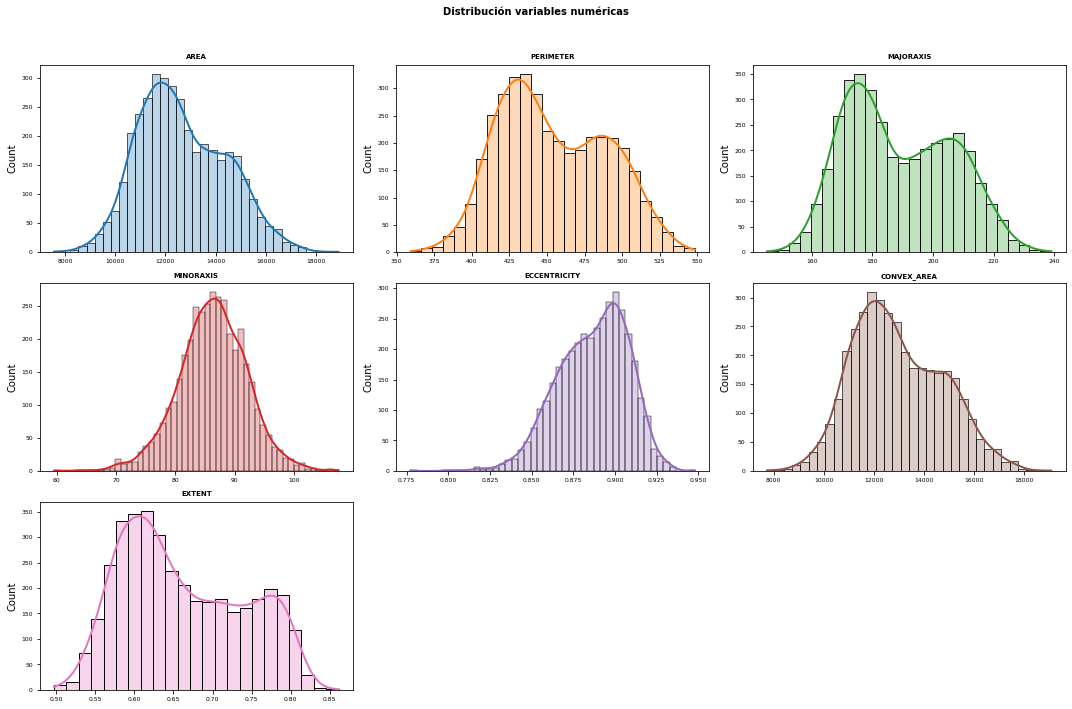

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat

for i, colum in enumerate(features):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

#### 3.6.2. DISTRIBUCIÓN DE LAS VARIABLES PREDICTORAS RESPECTO A LA VARIABLE RESPUESTA 

En este apartado comprobaremos la relación existente entre las variables indepEndientes con respecto a la variable dependiente. 

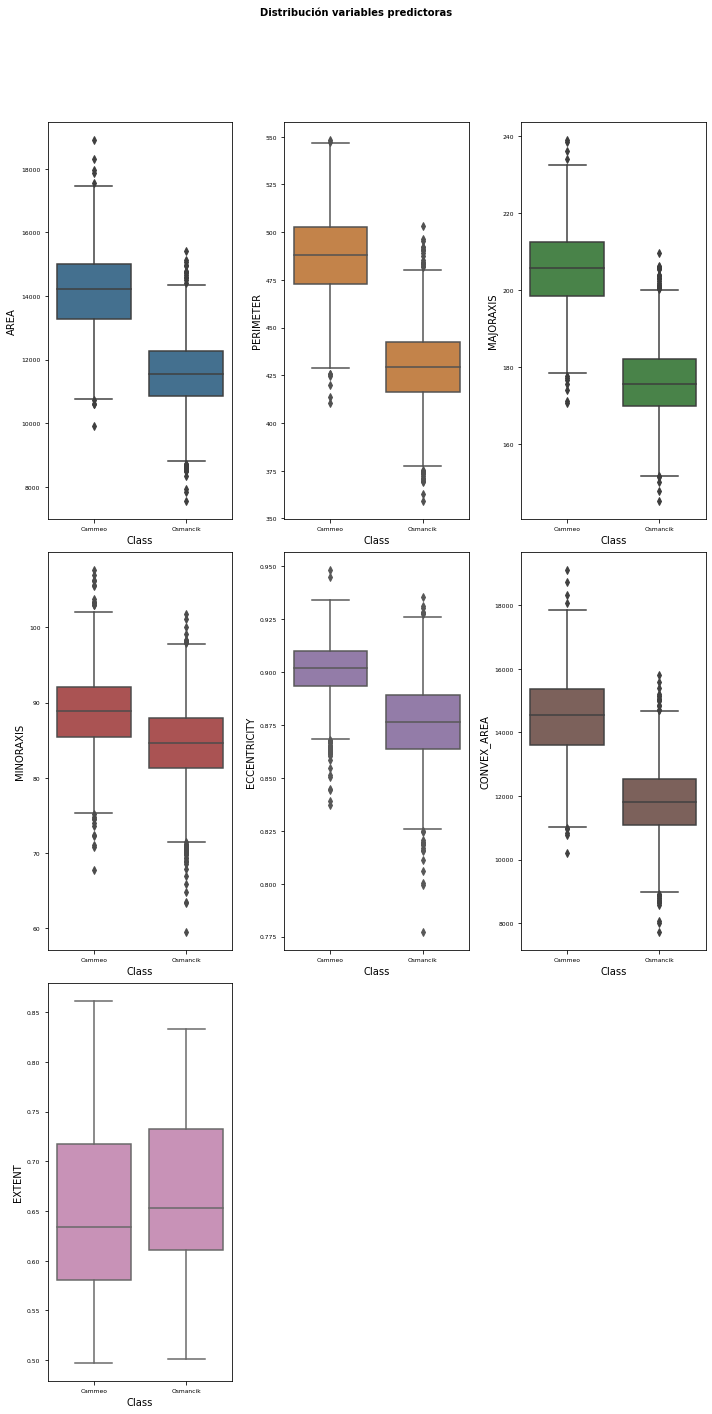

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 20))
axes = axes.flat

for i, column in enumerate(features):
    sns.boxplot(
        data    = df,
        y       = column,
        x       = df['CLASS'],
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        saturation   = 0.5,
        ax      = axes[i]
    )
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("Class")
    
# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables predictoras', fontsize = 10, fontweight = "bold");

Mediante estas gráficas de cajas podemos observar que en general hay una buena correlación entre las variables predictoras y la variable respuesta. Quizás las dos variables en las que se visualiza una menor correlación es en la variable **Extent** y **Minor Axis**.

#### 3.6.3. TRANSFORMAR LA VARIABLE RESPUESTA A NUMÉRICA

Para poder hacer un cálculo de correlación entre las variables predictoras y la variable respuesta más exhaustivo, transformaremos la variable respuesta de categórica a numérica, asignando el valor 0 a la variedad **Cammeo** y 1 a la variedad **Osmancik**.

In [12]:
for x in df.index:
    if df.loc[x, "CLASS"] == 'Cammeo':
        df.loc[x, "CLASS"] = 0
    elif df.loc[x, "CLASS"] == 'Osmancik':
        df.loc[x, "CLASS"] = 1
       
df['CLASS'] = pd.to_numeric(df['CLASS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          3810 non-null   int64  
 1   PERIMETER     3810 non-null   float64
 2   MAJORAXIS     3810 non-null   float64
 3   MINORAXIS     3810 non-null   float64
 4   ECCENTRICITY  3810 non-null   float64
 5   CONVEX_AREA   3810 non-null   int64  
 6   EXTENT        3810 non-null   float64
 7   CLASS         3810 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 238.2 KB


#### 3.6.4. CORRELACIÓN RESPECTO A LA VARIABLE RESPUESTA

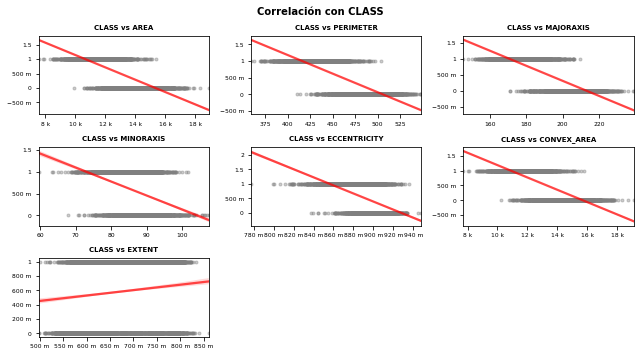

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat

for i, colum in enumerate(features):
    sns.regplot(
        x           = df[colum],
        y           = df['CLASS'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"CLASS vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con CLASS', fontsize = 10, fontweight = "bold");

In [14]:
corr = round(df.corr(), 3)
corr.style.background_gradient()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
AREA,1.000000,0.966000,0.903000,0.788000,0.352000,0.999000,-0.061000,-0.746000
PERIMETER,0.966000,1.000000,0.972000,0.630000,0.545000,0.970000,-0.131000,-0.807000
MAJORAXIS,0.903000,0.972000,1.000000,0.452000,0.711000,0.903000,-0.140000,-0.828000
MINORAXIS,0.788000,0.630000,0.452000,1.000000,-0.292000,0.787000,0.063000,-0.370000
ECCENTRICITY,0.352000,0.545000,0.711000,-0.292000,1.000000,0.353000,-0.199000,-0.589000
CONVEX_AREA,0.999000,0.970000,0.903000,0.787000,0.353000,1.000000,-0.066000,-0.750000
EXTENT,-0.061000,-0.131000,-0.140000,0.063000,-0.199000,-0.066000,1.000000,0.118000
CLASS,-0.746000,-0.807000,-0.828000,-0.370000,-0.589000,-0.750000,0.118000,1.000000


In [15]:
corr = df.corr()
print(corr["CLASS"].sort_values(ascending=False))

CLASS           1.000000
EXTENT          0.117727
MINORAXIS      -0.370355
ECCENTRICITY   -0.588916
AREA           -0.746400
CONVEX_AREA    -0.750424
PERIMETER      -0.806572
MAJORAXIS      -0.827824
Name: CLASS, dtype: float64


Como se había interpretado en los gráficos de cajas, las variables **Major Axis**, **Perimete** y **Convex Area** tienen una fuerte correlación con la variable respuesta. La variable **Eccentricity** posee algo de correlación, y las variables **Minor Axis** y **Extent** una correlación muy baja.

## 4. Preprocesado

Estandarizamos las variables numéricas para que se midan en la misma escala. Utilizaremos el escalador *MinMax*, el cual otorga valores entre 0 y 1, siendo estos el valor mínimo y máximo respectivamente.

In [32]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head(10)

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,0.675937,0.879232,0.901216,0.532417,0.888011,0.693917,0.207577,Cammeo
1,0.625330,0.714095,0.648087,0.670663,0.691980,0.646009,0.324564,Cammeo
2,0.623394,0.750066,0.734349,0.588124,0.789846,0.635636,0.538576,Cammeo
3,0.495071,0.524136,0.512800,0.581461,0.671227,0.496220,0.393954,Cammeo
4,0.628146,0.781992,0.709138,0.620288,0.758067,0.662711,0.408680,Cammeo
5,0.521739,0.622754,0.584436,0.564838,0.726665,0.532964,0.441332,Cammeo
6,0.722232,0.793157,0.661705,0.808242,0.603667,0.740770,0.253812,Cammeo
7,0.779264,0.884466,0.814414,0.747850,0.733647,0.801160,0.444057,Cammeo
8,0.614593,0.657743,0.548144,0.739809,0.575004,0.633703,0.418655,Cammeo
9,0.522267,0.593992,0.565445,0.587270,0.700086,0.528393,0.205994,Cammeo


## 5. División de datos de entrenamiento y test


#### 5.1. SEPARACIÓN DE DATOS
Dadas las circunstancias de correlación entre variables independientes y respuesta, se opta por prescindir de las variables **minoraxis** y **extent**.

Seguidamente se hacen las particiones correspondientes a los grupos de entrenamiento y test, siendo el tamaño de los datos de entrenamiento de un 80% con respecto al dataset completo.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
                                         df.drop(columns = ['MINORAXIS', 'EXTENT', 'CLASS'], axis = 'columns'),
                                         df[label],
                                         train_size      = 0.8,
                                         random_state    = 0
                                     )


print ('Datos de entrenamiento: %d\nDatos de test: %d' % (X_train.shape[0], X_test.shape[0]))

Datos de entrenamiento: 3048
Datos de test: 762


In [18]:
print("Partición datos de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición datos de entrenamento
-----------------------
count    3048.000000
mean        0.575787
std         0.494304
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CLASS, dtype: float64


In [19]:
print("Partición datos de test")
print("-----------------------")
print(y_test.describe())

Partición datos de test
-----------------------
count    762.000000
mean       0.557743
std        0.496981
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: CLASS, dtype: float64


#### 5.2. DISTRIBUCIÓN DE LA VARIABLE RESPUESTA

Comprobamos que la distribución de la variable respuesta sea similar en los sets de entrenamiento y test. Una distribución muy dispar entre ambos sets podría dar problemas al modelo a la hora de enfrentarlo a los datos de test.

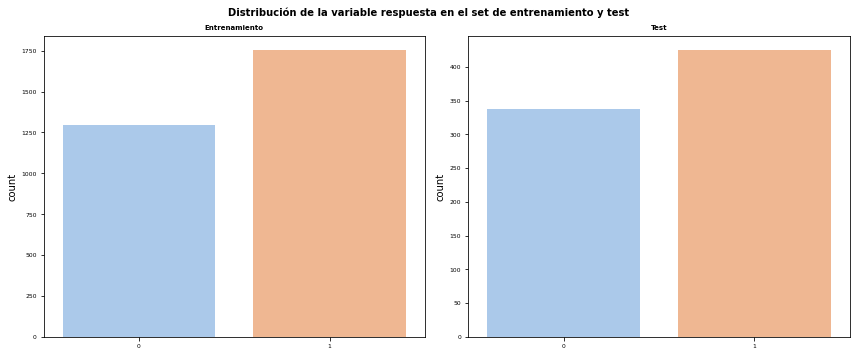

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flat
dt = [y_train, y_test]
title = ["Entrenamiento", "Test"]

for i, d in enumerate(dt):
    sns.countplot(
        x        = d,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        palette  = "pastel",
        ax       = axes[i]
    )
    axes[i].set_title(title[i], fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de la variable respuesta en el set de entrenamiento y test', fontsize = 10, fontweight = "bold");

## 6. Creación de un modelo

### LOGISTIC REGRESSION

In [21]:
# Create classifier
model = LogisticRegression(random_state=0)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)

## 7. Evaluación del modelo

En primer lugar creamos los métodos que nos van a servir para calcular y mostrar diferentes marcadores y métricas de la calidad de los modelos.

In [22]:
# PRECISIÓN DEL CLASIFICADOR y MATRIZ DE CONFUSIÓN

def get_accuracy_scores(y_test, predictions, clf_name):  
    print('%s accuracy score: %.4f' % (clf_name, accuracy_score(y_test, predictions)))
    print('Overall Precision: ', precision_score(y_test, predictions))
    print('Overall Recall: ', recall_score(y_test, predictions))
    print('Classification report:\n', classification_report(y_test, predictions))
    
    cm = confusion_matrix(y_test, predictions)
    print ('\n\nConfusion Matrix:\n', cm)

In [23]:
# MATRIZ DE CONFUSIÓN y MATRIZ DE PROBABILIDADES

def get_pred_proba(X_test, y_test, predictions, clf):  
    y_scores = pd.DataFrame(data=clf.predict_proba(X_test))
    print('\nPredict proba:\n', y_scores) 

In [24]:
# CURVA ROC

def get_roc(X_test, y_test, clf):
    
    
    # calculate ROC curve
    y_scores = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

    # plot ROC curve
    print('\n\nROC Curve')
    fig = plt.figure(figsize=(6, 6))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    

    auc = roc_auc_score(y_test, y_scores[:,1])
    print('\nROC AUC Score: ' + str(auc))
    return auc

Logistic Regression accuracy score: 0.9383
Overall Precision:  0.9354838709677419
Overall Recall:  0.9552941176470588
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       337
           1       0.94      0.96      0.95       425

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762



Confusion Matrix:
 [[309  28]
 [ 19 406]]


ROC Curve


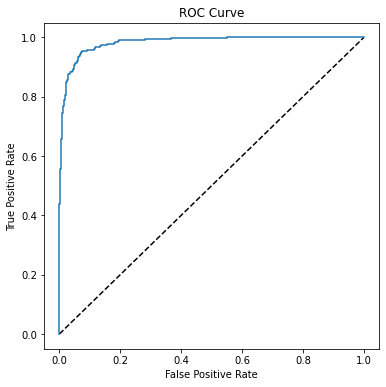


ROC AUC Score: 0.9828521556990748


In [25]:
# LOGISTIC REGRESSION

# Accuracy scores
get_accuracy_scores(y_test, pred, 'Logistic Regression')

# Predict proba
#get_pred_proba(X_test, y_test, pred, clf)

# ROC curve
auc_lr = get_roc(X_test, y_test, model)

## 8. Utilización de otros algoritmos e hiperparámetros

En esta sección se utilizarán diversos algoritmos de clasificación para crear diferentes modelos a los que se le aplicará la técnica de validación cruzada, o cross validation, para tratar de encontrar los mejores hiperparámetros de cada uno de ellos.

### K NEIGHBORS con GridSearchCV

Mejor parámetro: {'algorithm': 'ball_tree', 'n_neighbors': 25, 'weights': 'uniform'} 

K Neighbors accuracy score: 0.9318
Overall Precision:  0.930715935334873
Overall Recall:  0.9482352941176471
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       337
           1       0.93      0.95      0.94       425

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



Confusion Matrix:
 [[307  30]
 [ 22 403]]


ROC Curve


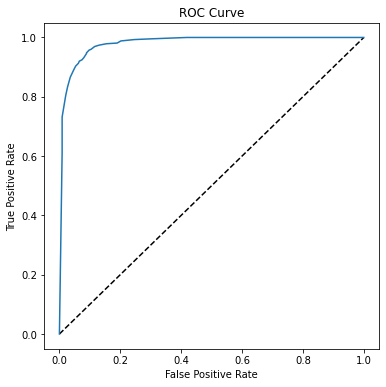


ROC AUC Score: 0.979916215744458


In [26]:
# modelo
model = KNeighborsClassifier()

# parámetros
params = {
 'n_neighbors' : [1, 5, 10, 15, 20, 25, 30],
 'weights'     : ['uniform', 'distance'] ,
 'algorithm'   : ['ball_tree', 'kd_tree', 'brute'] 
}

# gridsearchCV
gridsearch = GridSearchCV(model, params, cv=5)
gridsearch.fit(X_train, y_train)

# Evaluación del mejor modelo
model = gridsearch.best_estimator_
pred = model.predict(X_test)

# Métricas
print("Mejor parámetro:", gridsearch.best_params_, "\n")
get_accuracy_scores(y_test, pred, 'K Neighbors')
auc_kn = get_roc(X_test, y_test, model)

### DECISION TREE con GridSearchCV

Mejor parámetro: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 50} 

Decision Tree accuracy score: 0.9304
Overall Precision:  0.9246575342465754
Overall Recall:  0.9529411764705882
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       337
           1       0.92      0.95      0.94       425

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



Confusion Matrix:
 [[304  33]
 [ 20 405]]


ROC Curve


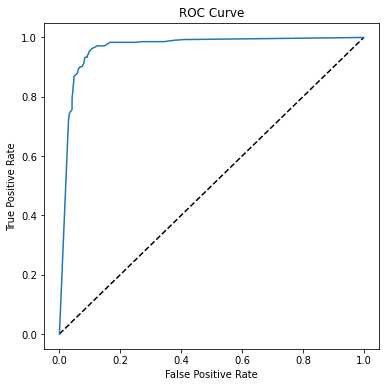


ROC AUC Score: 0.9646884272997033


In [27]:
# modelo
model = tree.DecisionTreeClassifier()

# parámetros
params = {
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [10, 20, 30, 40, 50]
}

# gridsearchCV
gridsearch = GridSearchCV(model, params, cv=5)
gridsearch.fit(X_train, y_train)

# Evaluación del mejor modelo
model = gridsearch.best_estimator_
pred = model.predict(X_test)

# Métricas
print("Mejor parámetro:", gridsearch.best_params_, "\n")
get_accuracy_scores(y_test, pred, 'Decision Tree')
auc_dt = get_roc(X_test, y_test, model)

### SUPPORT VECTOR MACHINE con GridSearchCV

Mejor parámetro: {'C': 10, 'gamma': 1, 'kernel': 'poly', 'probability': True} 

SVM accuracy score: 0.9344
Overall Precision:  0.9271070615034168
Overall Recall:  0.9576470588235294
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       337
           1       0.93      0.96      0.94       425

    accuracy                           0.93       762
   macro avg       0.94      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



Confusion Matrix:
 [[305  32]
 [ 18 407]]


ROC Curve


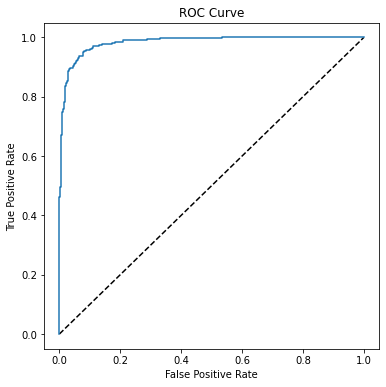


ROC AUC Score: 0.9832361668703089


In [28]:
# modelo
model = svm.SVC()

# parámetros
params = {
 'C'          : [0.1, 1, 10, 100], 
 'gamma'      : [1, 0.1, 0.01, 0.001],
 'kernel'     : ['rbf', 'poly', 'sigmoid'],
 'probability': [True]
}

# gridsearchCV
gridsearch = GridSearchCV(model, params, cv=5)
gridsearch.fit(X_train, y_train)

# Evaluación del mejor modelo
model = gridsearch.best_estimator_
pred = model.predict(X_test)

# Métricas
print("Mejor parámetro:", gridsearch.best_params_, "\n")
get_accuracy_scores(y_test, pred, 'SVM')
auc_svm = get_roc(X_test, y_test, model)

### GAUSSIAN NAIVE BAYES con GridSearchCV

Mejor parámetro: {'var_smoothing': 0.533669923120631} 

SVM accuracy score: 0.9278
Overall Precision:  0.9147982062780269
Overall Recall:  0.96
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       337
           1       0.91      0.96      0.94       425

    accuracy                           0.93       762
   macro avg       0.93      0.92      0.93       762
weighted avg       0.93      0.93      0.93       762



Confusion Matrix:
 [[299  38]
 [ 17 408]]


ROC Curve


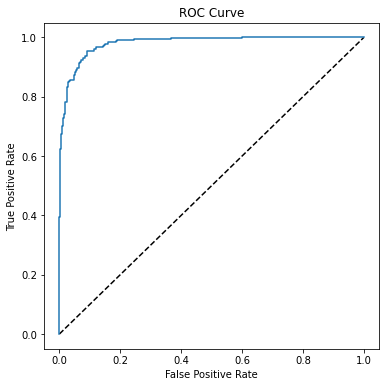


ROC AUC Score: 0.9805969628207366


In [29]:
# modelo
model = GaussianNB()

# parámetros
params = {
 'var_smoothing': np.logspace(0,-9, num=100)
}

# gridsearchCV
gridsearch = GridSearchCV(model, params, cv=5)
gridsearch.fit(X_train, y_train)

# Evaluación del mejor modelo
model = gridsearch.best_estimator_
pred = model.predict(X_test)

# Métricas
print("Mejor parámetro:", gridsearch.best_params_, "\n")
get_accuracy_scores(y_test, pred, 'SVM')
auc_gnb = get_roc(X_test, y_test, model)

## 9. Comparativa de resultados

En esta última parte se compararán los resultados de la evaluación de cada uno de los modelos creados anteriormente.

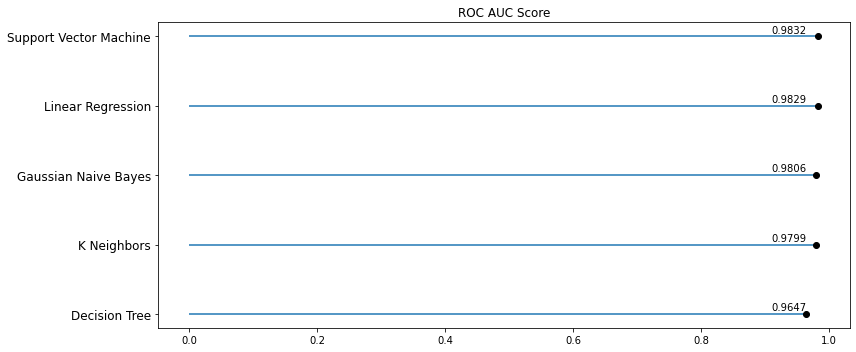

In [30]:
auc = pd.DataFrame({
                        'modelo': ['Linear Regression', 'K Neighbors', 'Support Vector Machine', 'Decision Tree', 'Gaussian Naive Bayes'],
                        'auc': [auc_lr, auc_kn, auc_svm, auc_dt, auc_gnb]
                     })
auc = auc.sort_values('auc', ascending=True)


fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))


axe.hlines(auc.modelo, xmin=0, xmax=auc.auc)
axe.plot(auc.auc, auc.modelo, "o", color='black')
axe.tick_params(axis='y', which='major', labelsize=12)
axe.set_title('ROC AUC Score')

for i, val in enumerate(auc.auc):
    axe.text(0.91, i+0.05, "%.4f" % val)


fig.tight_layout()

### FUENTES

* Creación de modelos de Machine Learning: https://docs.microsoft.com/es-es/learn/paths/create-machine-learn-models/